## SK 유동인구 EDA 파일

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

import os

In [2]:
FLOWTIME_PATH = '/Users/minki/pythonworkspace/bigcon2020/2020dataset/SK_data/FLOW_TIME'
FLOWAGE_PATH = '/Users/minki/pythonworkspace/bigcon2020/2020dataset/SK_data/FLOW_AGE'

In [3]:
sk_data_TIME = pd.read_excel(f'{FLOWTIME_PATH}/SK_TIME_DATA.xlsx')
sk_data_AGE = pd.read_excel(f'{FLOWAGE_PATH}/SK_AGE_DATA.xlsx')

del sk_data_TIME['Unnamed: 0']
del sk_data_AGE['Unnamed: 0']

### EDA 데이터 2019, 2020으로 쪼개기

In [17]:
sk_TIME_2019 = sk_data_TIME[sk_data_TIME['STD_YM'] < 202000]
sk_TIME_2020 = sk_data_TIME[sk_data_TIME['STD_YM'] >= 202000]

sk_AGE_2019 = sk_data_AGE[sk_data_AGE['STD_YM'] < 202000]
sk_AGE_2020 = sk_data_AGE[sk_data_AGE['STD_YM'] >= 202000]

In [47]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
plt.rcParams["figure.figsize"] = (20, 10)
register_matplotlib_converters()

mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')

## 1. 시간별 유동인구 EDA

In [22]:
sk_data_TIME['HDONG_NM'].value_counts(dropna = False, normalize = False)

공릉2동      241
상계8동      241
성내1동      241
황학동       241
고산1동      241
         ... 
만촌1동      241
성내3동      241
중계2.3동    241
중계4동      241
범어3동      241
Name: HDONG_NM, Length: 69, dtype: int64

### 1-1. 월별 시간대별 유동인구

In [35]:
sk_month_move = sk_data_TIME.groupby([sk_data_TIME['STD_YM'], sk_data_TIME['CITY']]).sum().iloc[:, 2:]

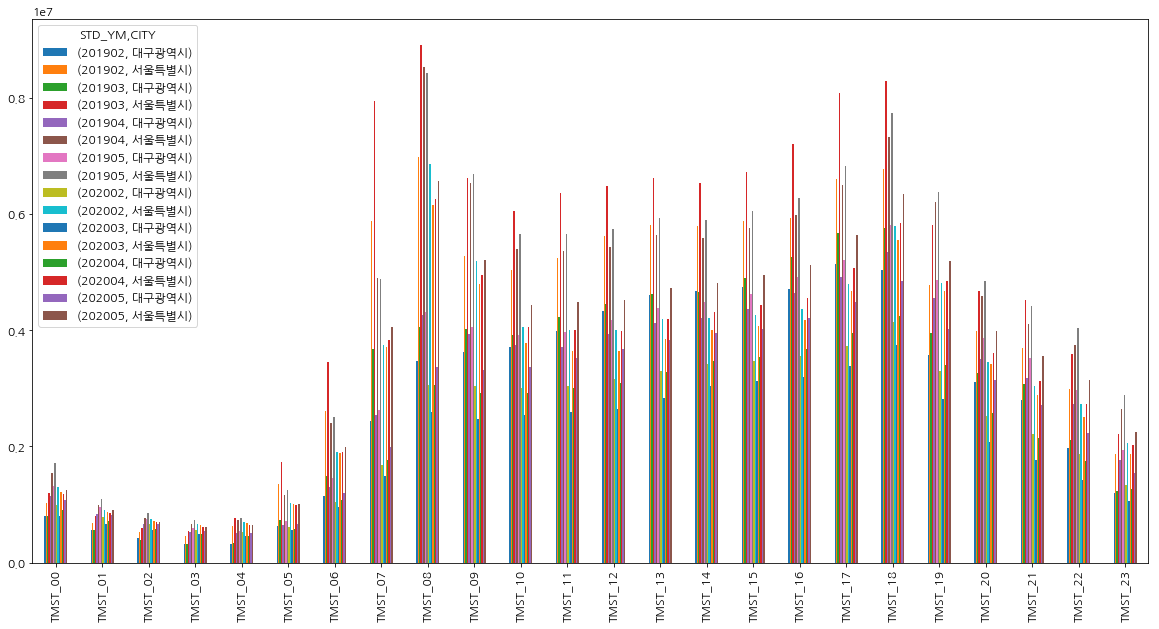

In [50]:
sk_month_move.T.plot(kind = 'bar')

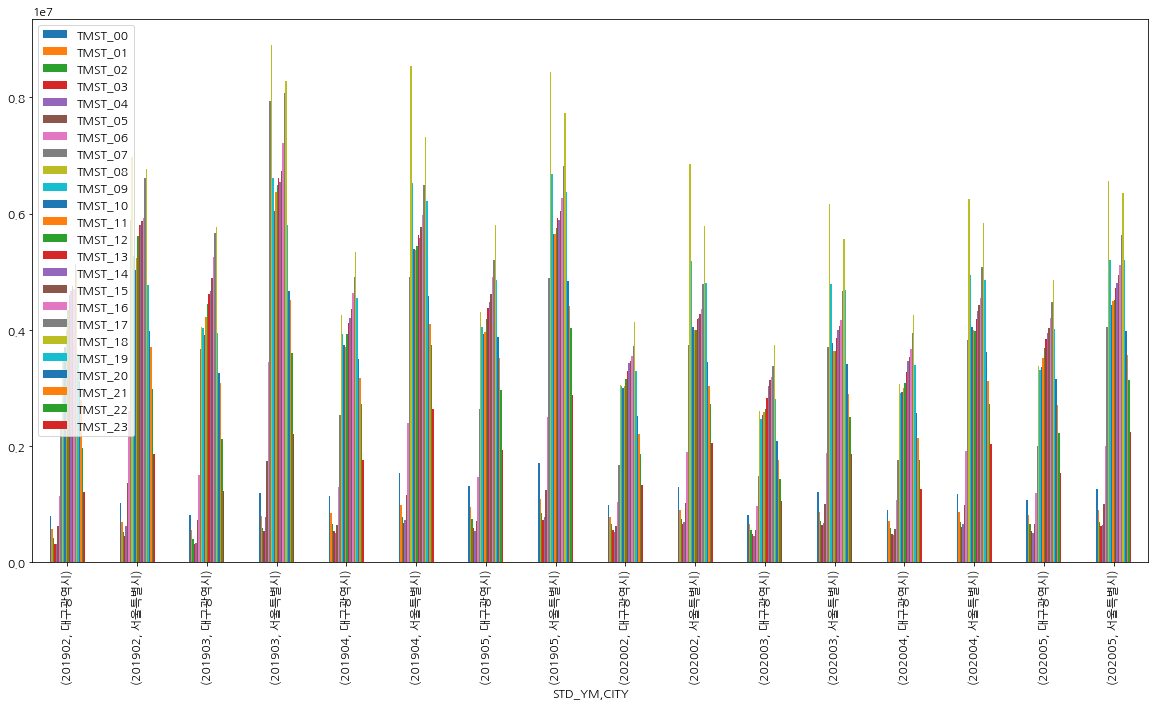

In [52]:
sk_month_move.plot(kind = 'bar')

#### - 일반적으로 서울시의 유동인구가 대구시보다 많고, 출근시간인 7-9시와 퇴근시간인 17-19시가 다른 시간대보다 유동인구가 많은것을 볼 수 있음.